<a href="https://colab.research.google.com/github/JosePimienta/Zonas-WIFI/blob/main/Estudio_de_zonas_wifi_en_la_ciudad_de_Cartagena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade folium

Importar desde Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importar librerias

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import folium
import geopandas as gpd
from tabulate import tabulate

Cargar archivo

In [6]:
#Cargar datos CSV
df = pd.read_csv("/content/drive/MyDrive/Zonas WIFI/Uso_de_Zonas_Wifi_Cartagena.csv")

# Cargar el GeoJSON con geopandas
gdf = gpd.read_file("/content/drive/MyDrive/Zonas WIFI/Barrios_de_Cartagena.geojson")

Lista de corregimientos o barrios

In [7]:
# Extraer barrios únicos
barrios_unicos = df["Corregimiento/Barrio"].drop_duplicates().tolist()

# Crear datos como lista de listas
data = [[i, barrio] for i, barrio in enumerate(barrios_unicos)]

# Mostrar como tabla
print(tabulate(data, headers=["Índice", "Barrio"], tablefmt="grid"))

+----------+-------------------------+
|   Índice | Barrio                  |
+==========+=========================+
|        0 | NUEVO PARAISO           |
+----------+-------------------------+
|        1 | CIUDAD DEL BICENTENARIO |
+----------+-------------------------+
|        2 | LA BOQUILLA             |
+----------+-------------------------+
|        3 | PONTEZUELA              |
+----------+-------------------------+
|        4 | BAYUNCA                 |
+----------+-------------------------+
|        5 | CIUDADELA LA PAZ        |
+----------+-------------------------+
|        6 | COLOMBIATON             |
+----------+-------------------------+
|        7 | EL SOCORRO              |
+----------+-------------------------+
|        8 | PUNTA CANOA             |
+----------+-------------------------+
|        9 | TIERRA BOMBA            |
+----------+-------------------------+
|       10 | SAN FRANCISCO           |
+----------+-------------------------+
|       11 | EL BOSQUE   

Mapa de corregimientos o barrios de toda la ciudad

In [8]:
# Crear el mapa centrado en una ubicación
mapa_general = folium.Map(location=[10.4, -75.5], zoom_start = 12)

# Agregar cada barrio con su nombre en el tooltip
for _, barrio in gdf.iterrows():
    folium.GeoJson(
        barrio.geometry,
        tooltip = barrio["NOMBRE"]  # Clave de nombre en GeoJSON
    ).add_to(mapa_general)

# Mostrar el mapa
mapa_general

Ingreso de corregimiento o barrio

In [53]:
# Extraer barrios únicos
#barrios_unicos = df["Corregimiento/Barrio"].drop_duplicates().tolist()

# Crear datos como lista de listas
#data = [[i, barrio] for i, barrio in enumerate(barrios_unicos)]

# Mostrar como tabla
print(tabulate(data, headers=["Índice", "Barrio"], tablefmt="grid"))

#print("\nINGRESE EL NOMBRE DEL CORREGIMIENTO O BARRIO EN MAYÚSCULAS")
#seleccionar_barrio = input()
barrio_seleccionado = input("INGRESE UNO O MAS BARRIOS EN MAYÚSCULA SEPARADOS POR COMAS (,): ")

+----------+-------------------------+
|   Índice | Barrio                  |
+==========+=========================+
|        0 | NUEVO PARAISO           |
+----------+-------------------------+
|        1 | CIUDAD DEL BICENTENARIO |
+----------+-------------------------+
|        2 | LA BOQUILLA             |
+----------+-------------------------+
|        3 | PONTEZUELA              |
+----------+-------------------------+
|        4 | BAYUNCA                 |
+----------+-------------------------+
|        5 | CIUDADELA LA PAZ        |
+----------+-------------------------+
|        6 | COLOMBIATON             |
+----------+-------------------------+
|        7 | EL SOCORRO              |
+----------+-------------------------+
|        8 | PUNTA CANOA             |
+----------+-------------------------+
|        9 | TIERRA BOMBA            |
+----------+-------------------------+
|       10 | SAN FRANCISCO           |
+----------+-------------------------+
|       11 | EL BOSQUE   

Mapa de corregimiento o barrio seleccionado

In [25]:
# Crear el mapa centrado en Cartagena
mapa_seleccion = folium.Map(location=[10.4, -75.5], zoom_start=13)

# Pedir al usuario los barrios y dividirlos en una lista
#barrio_seleccionado = input("INGRESE UNO O MAS BARRIOS EN MAYÚSCULA SEPARADOS POR COMAS (,): ")
barrios_seleccionados = [b.strip() for b in barrio_seleccionado.split(",")]

# Filtrar los barrios en el GeoDataFrame
barrios_filtrados = gdf[gdf["NOMBRE"].isin(barrios_seleccionados)]

# Encontrar los barrios que NO están en el GeoJSON
barrios_no_encontrados = [b for b in barrios_seleccionados if b not in barrios_filtrados["NOMBRE"].values]

# Verificar si se encontraron barrios en el GeoJSON
if not barrios_filtrados.empty:
    for _, barrio in barrios_filtrados.iterrows():
        #print(barrio_seleccionado)
        folium.GeoJson(
            barrio.geometry,
            tooltip=barrio["NOMBRE"]
        ).add_to(mapa_seleccion)

# Mostrar los barrios que no se encontraron
if barrios_no_encontrados:
    print("\nLos siguientes barrios NO fueron encontrados en el GeoJSON:")
    for barrio in barrios_no_encontrados:
        print("-", barrio)

# Mostrar el mapa
mapa_seleccion


Gráficos de datos seleccionados

In [101]:
#
df_filtrado = df[df["Corregimiento/Barrio"].isin(barrios_seleccionados)]

#
df_filtrado = pd.concat([df_filtrado, df[df["Corregimiento/Barrio"].isin(barrios_seleccionados)]])

In [102]:
# Extraer barrios únicos
barrios_uni= df_filtrado["Corregimiento/Barrio"].drop_duplicates().tolist()

# Crear datos como lista de listas
datta = [[i, barrrio] for i, barrrio in enumerate(barrios_uni)]

# Mostrar como tabla
print(tabulate(datta, headers=["Índice", "Barrio"], tablefmt="grid"))

+----------+------------+
|   Índice | Barrio     |
+==========+============+
|        0 | EL SOCORRO |
+----------+------------+
|        1 | TERNERA    |
+----------+------------+


In [103]:
df_filtrado

,Corregimiento/Barrio,Zona Wifi,Fecha,Visitas,Logins,Dispositivos Nuevos,Sesiones,Consumidores
1101,EL SOCORRO,JORGE ARTEL,06/01/2024 12:00:00 AM,26,21,17,130,17.0
1102,EL SOCORRO,JORGE ARTEL,06/02/2024 12:00:00 AM,32,27,14,96,13.0
1103,EL SOCORRO,JORGE ARTEL,06/03/2024 12:00:00 AM,28,22,14,74,14.0
1104,EL SOCORRO,JORGE ARTEL,06/04/2024 12:00:00 AM,73,63,24,393,22.0
1105,EL SOCORRO,JORGE ARTEL,06/05/2024 12:00:00 AM,85,71,28,273,25.0
...,...,...,...,...,...,...,...,...
4198,TERNERA,INSPECCION DE POLICIA DE TERNERA,09/26/2024 12:00:00 AM,42,40,18,332,15.0
4199,TERNERA,INSPECCION DE POLICIA DE TERNERA,09/27/2024 12:00:00 AM,107,91,37,1137,34.0
4200,TERNERA,INSPECCION DE POLICIA DE TERNERA,09/28/2024 12:00:00 AM,80,62,31,698,26.0
4201,TERNERA,INSPECCION DE POLICIA DE TERNERA,09/29/2024 12:00:00 AM,33,24,17,207,11.0


Ingrese el mes a consultar: 6
Gráfico para EL SOCORRO:


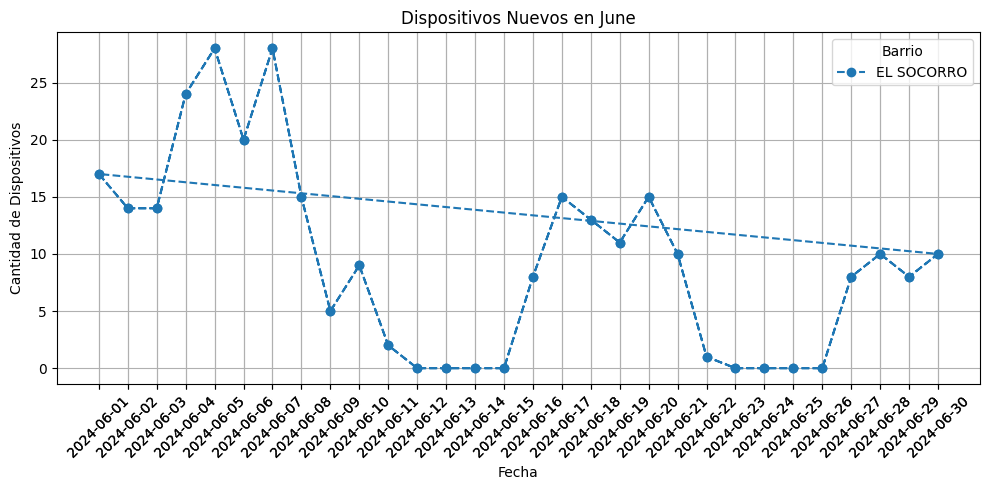

Gráfico para TERNERA:


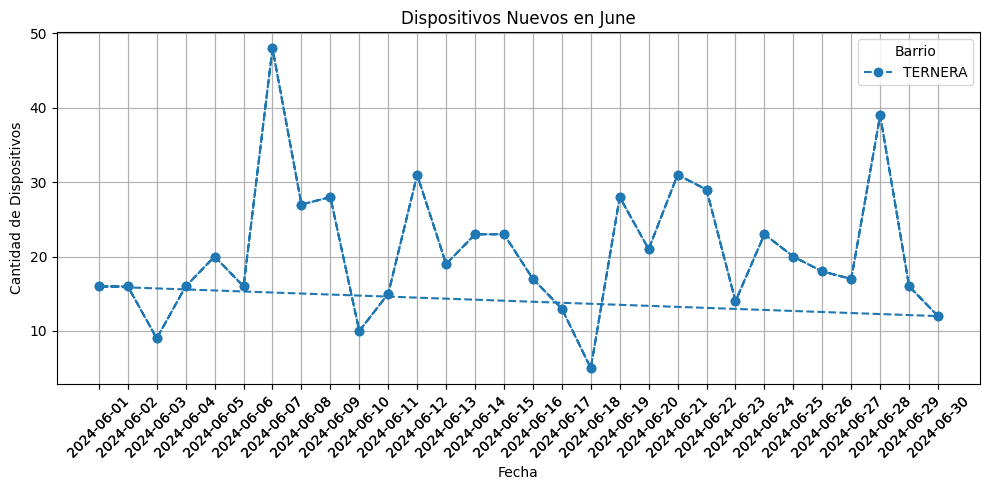

In [119]:
# Convertir la columna "Fecha" a datetime
df_filtrado = df_filtrado.copy()  # Hace una copia para evitar modificar el original

df_filtrado["Fecha"] = pd.to_datetime(df_filtrado["Fecha"])


# Seleccionar mes
mes = int(input("Ingrese el mes a consultar: "))

# Seleccionar mes de conjunto de datos
df_mes = df_filtrado[df_filtrado["Fecha"].dt.month == mes]

# Mes en texto (en español)
nombre_mes = pd.to_datetime(str(mes), format='%m').strftime('%B')

# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    print(f"Gráfico para {barrio}:")
    # Crear la figura
    plt.figure(figsize=(10, 5))

    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    plt.plot(df_barrio["Fecha"], df_barrio["Dispositivos Nuevos"], marker='o', linestyle='--', label=barrio)
    # Rotar etiquetas del eje X para mejor visualización
    plt.xticks(df_barrio['Fecha'], rotation=45)
    plt.title(f"Dispositivos Nuevos en {nombre_mes}")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad de Dispositivos")
    plt.legend(title="Barrio")  # Mostrar leyenda con los nombres de los barrios
    plt.tight_layout()
    plt.grid()
    plt.show()

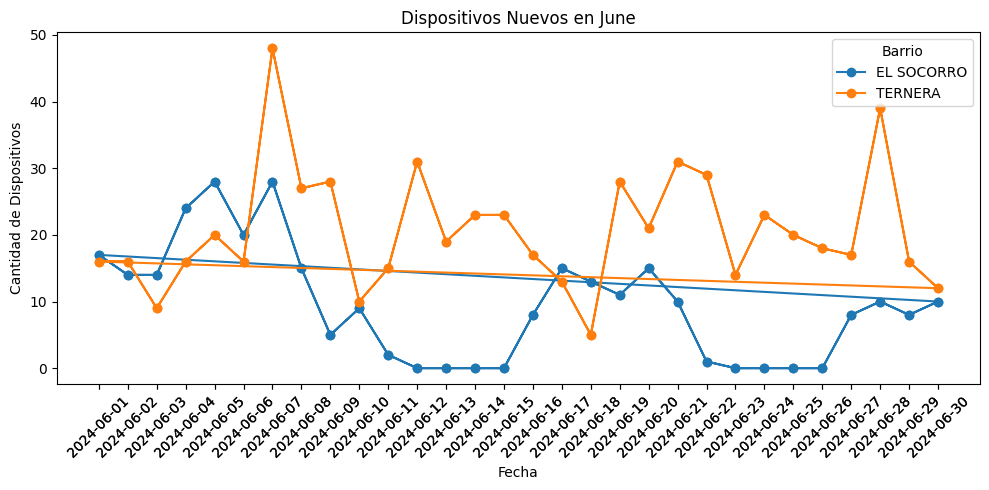

In [120]:
# Crear la figura
plt.figure(figsize=(10, 5))

# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    plt.plot(df_barrio["Fecha"], df_barrio["Dispositivos Nuevos"], marker='o', linestyle='-', label=barrio)

# Rotar etiquetas del eje X para mejor visualización
plt.xticks(df_barrio['Fecha'], rotation=45)
plt.title(f"Dispositivos Nuevos en {nombre_mes}")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Dispositivos")
plt.legend(title="Barrio")  # Mostrar leyenda con los nombres de los barrios
plt.tight_layout()
plt.show()


Datos de barrios seleccionados

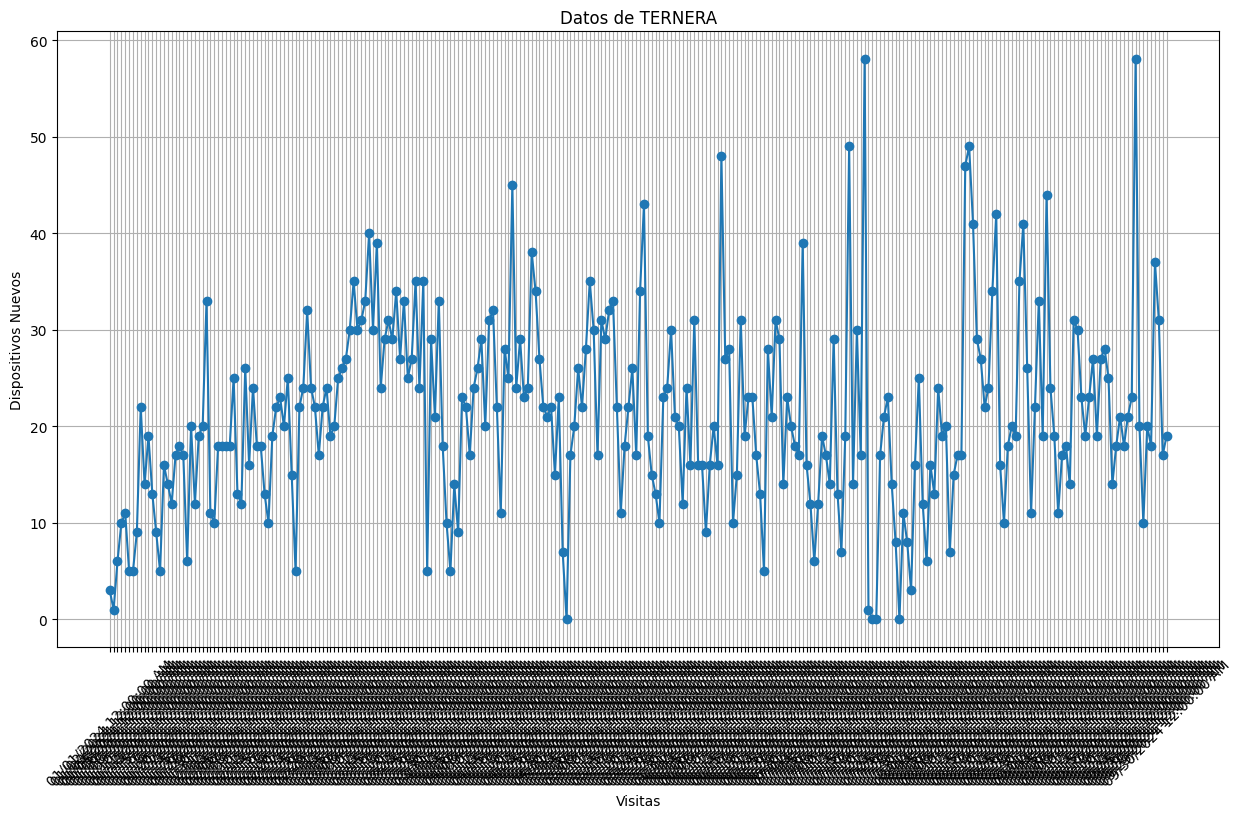

In [76]:
# Filtrar los datos donde la columna NOMBRE tenga el valor deseado
nombre_filtrado = "TERNERA"
df_filtrado = df[df["Corregimiento/Barrio"] == nombre_filtrado]

# Verificar si hay datos después del filtro
if df_filtrado.empty:
    print(f"No hay datos para '{nombre_filtrado}'.")
else:
    # Crear el gráfico (ejemplo: gráfico de líneas)
    plt.figure(figsize=(15, 8))
    plt.plot(df_filtrado["Fecha"], df_filtrado["Dispositivos Nuevos"], marker='o', linestyle='-')
    #df_filtrado['Dispositivos Nuevos'].plot(kind='line', figsize=(8, 4), title='Dispositivos Nuevos')

    # Personalizar el gráfico
    plt.title(f"Datos de {nombre_filtrado}")
    plt.xlabel("Visitas")
    plt.ylabel("Dispositivos Nuevos")
    plt.xticks(rotation=45)
    plt.grid()

    # Mostrar el gráfico
    plt.show()


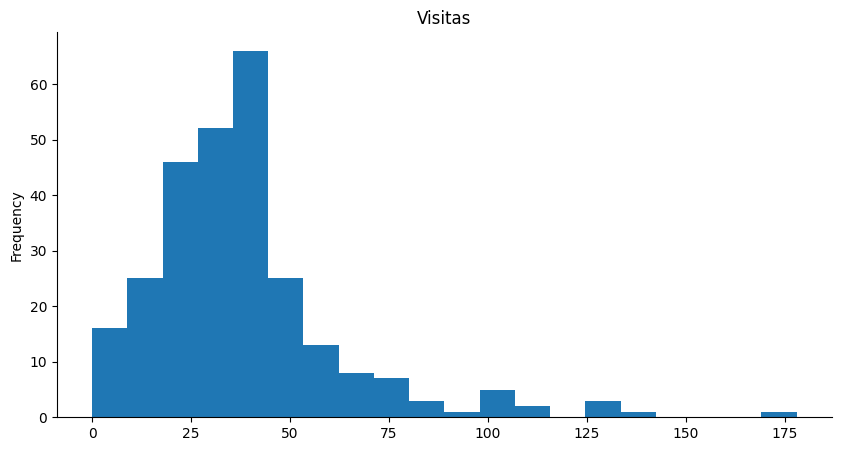

In [ ]:
df_filtrado['Visitas'].plot(kind='hist', bins=20, title='Visitas')
plt.gca().spines[['top', 'right']].set_visible(False)

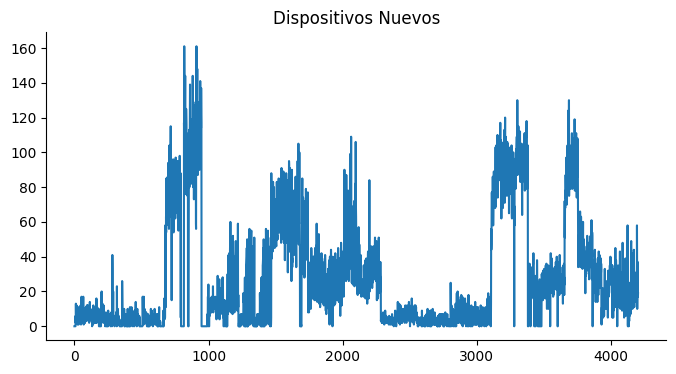

In [ ]:
# @title Dispositivos Nuevos

from matplotlib import pyplot as plt
df['Dispositivos Nuevos'].plot(kind='line', figsize=(8, 4), title='Dispositivos Nuevos')
plt.gca().spines[['top', 'right']].set_visible(False)

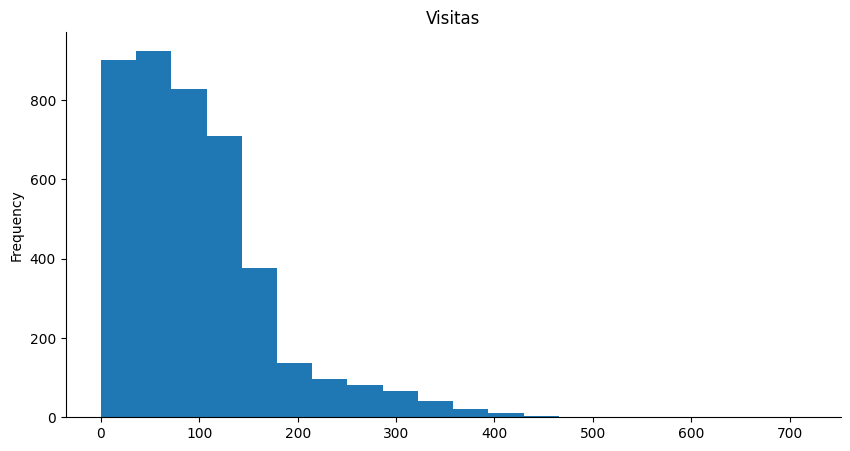

In [ ]:
# @title Visitas

from matplotlib import pyplot as plt
df['Visitas'].plot(kind='hist', bins=20, title='Visitas')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: title={'center': 'Dispositivos Nuevos'}>

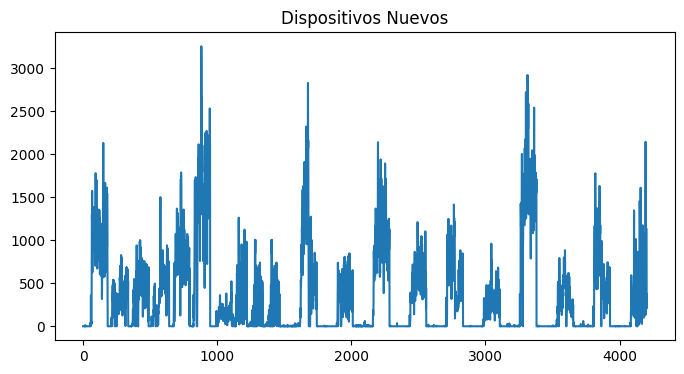

In [ ]:
df['Sesiones'].plot(kind='line', figsize=(8, 4), title='Dispositivos Nuevos')

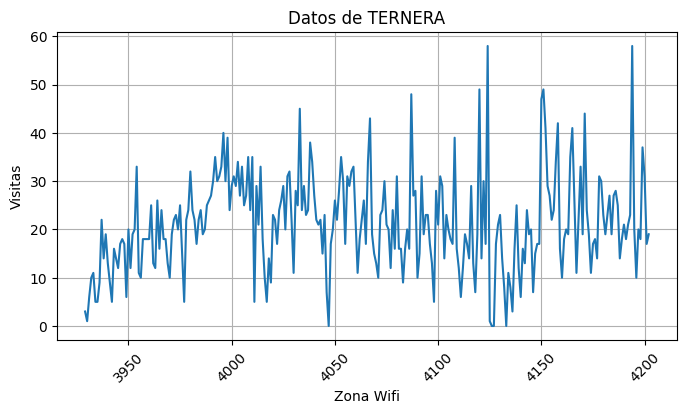

In [77]:
# Filtrar los datos donde la columna NOMBRE tenga el valor deseado
nombre_filtrado = "TERNERA"
df_filtrado = df[df["Corregimiento/Barrio"] == nombre_filtrado]

# Verificar si hay datos después del filtro
if df_filtrado.empty:
    print(f"No hay datos para '{nombre_filtrado}'.")
else:
    # Crear el gráfico (ejemplo: gráfico de líneas)
    plt.figure(figsize=(8, 8))
    #plt.plot(df_filtrado["Visitas"], df_filtrado["Logins"], marker='o', linestyle='-')
    df_filtrado['Dispositivos Nuevos'].plot(kind='line', figsize=(8, 4), title='Dispositivos Nuevos')

    # Personalizar el gráfico
    plt.title(f"Datos de {nombre_filtrado}")
    plt.xlabel("Zona Wifi")
    plt.ylabel("Visitas")
    plt.xticks(rotation=45)
    plt.grid()

    # Mostrar el gráfico
    plt.show()


In [ ]:
df_filtrado

,Corregimiento/Barrio,Zona Wifi,Fecha,Visitas,Logins,Dispositivos Nuevos,Sesiones,Consumidores
3929,TERNERA,INSPECCION DE POLICIA DE TERNERA,01/01/2024 12:00:00 AM,3,3,3,0,0.0
3930,TERNERA,INSPECCION DE POLICIA DE TERNERA,01/02/2024 12:00:00 AM,1,1,1,0,0.0
3931,TERNERA,INSPECCION DE POLICIA DE TERNERA,01/03/2024 12:00:00 AM,7,7,6,0,0.0
3932,TERNERA,INSPECCION DE POLICIA DE TERNERA,01/04/2024 12:00:00 AM,12,10,10,0,0.0
3933,TERNERA,INSPECCION DE POLICIA DE TERNERA,01/05/2024 12:00:00 AM,11,11,11,0,0.0
...,...,...,...,...,...,...,...,...
4198,TERNERA,INSPECCION DE POLICIA DE TERNERA,09/26/2024 12:00:00 AM,42,40,18,332,15.0
4199,TERNERA,INSPECCION DE POLICIA DE TERNERA,09/27/2024 12:00:00 AM,107,91,37,1137,34.0
4200,TERNERA,INSPECCION DE POLICIA DE TERNERA,09/28/2024 12:00:00 AM,80,62,31,698,26.0
4201,TERNERA,INSPECCION DE POLICIA DE TERNERA,09/29/2024 12:00:00 AM,33,24,17,207,11.0
